<a href="https://colab.research.google.com/github/maeda0622/machine_learning/blob/main/AI_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import preprocessing as prec


In [ ]:
input_data = np.array([[5.1, -2.9, 3.3],
                       [-1.2, 7.8, -6.1],
                       [3.9, 0.4, 2.1],
                       [7.3, -9.9, -4.5]])

In [ ]:
data_binarized = prec.Binarizer(threshold=2.1).transform(input_data)
print("Binarized data:\n", data_binarized)

Binarized data:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
data_scaler_minmax = prec.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("Min max scaled data:\n", data_scaled_minmax)

Min max scaled data:
 [[0.74117647 0.39548023 1.        ]
 [0.         1.         0.        ]
 [0.6        0.5819209  0.87234043]
 [1.         0.         0.17021277]]


In [ ]:
data_normalized_L1 = prec.normalize(input_data, norm = 'l1')
data_normalized_L2 = prec.normalize(input_data, norm = 'l2')
print("L1 normalized data:\n", data_normalized_L1)
print("L2 normalized data:\n", data_normalized_L2)

L1 normalized data:
 [[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]]
L2 normalized data:
 [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


In [ ]:
import numpy as np
from sklearn import preprocessing as pre

In [ ]:
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

In [ ]:
encoder = pre.LabelEncoder()
encoder.fit(input_labels)

LabelEncoder()

In [ ]:
print("label mapping")
for i, item in enumerate(encoder.classes_):
  print(item, '-->', i)

label mapping
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


In [ ]:
test_labels = ['green', 'red', 'black']
encoded_value = encoder.transform(test_labels)
print(test_labels)
print(list(encoded_value))

['green', 'red', 'black']
[1, 2, 0]


In [ ]:
encoded_value = [3,0,4,1]
decoded_list = encoder.inverse_transform(encoded_value)
print(encoded_value)
print(decoded_list)

[3, 0, 4, 1]
['white' 'black' 'yellow' 'green']


In [ ]:
from tensorflow import keras
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() #データのダウンロード

X_train = X_train.astype(np.float32) / 255

print(X_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

noise_num = 100

generator = keras.models.Sequential([
                                    keras.layers.Dense(7*7*128, input_shape = [noise_num]), #全結合層の第一引数の意味
                                    keras.layers.Reshape([7, 7, 128]), #なぜここでテンソルの形状を変換するのか
                                    keras.layers.BatchNormalization(),  
                                    
                                    keras.layers.Conv2DTranspose(
                                        64,
                                        kernel_size = 5,
                                        strides = 2,
                                        padding = 'same',
                                        activation = 'selu'
                                    ),
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Conv2DTranspose(
                                          1,
                                          kernel_size=5,
                                          strides = 2,
                                          padding = 'same',
                                          activation = 'tanh'
                                      )
])
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6272)              633472    
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 14, 14, 64)       204864    
 ranspose)                                                       
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
discriminator = keras.models.Sequential([
                                        keras.layers.Conv2D(
                                            64,
                                            kernel_size = 5,
                                            strides = 2,
                                            padding = 'same',
                                            activation = keras.layers.LeakyReLU(0.2),

                                            input_shape = [28, 28, 1]
                                        ),

                                        keras.layers.Dropout(0.4),

                                        keras.layers.Conv2D(
                                            128,
                                            kernel_size = 5,
                                            strides = 2,
                                            padding = 'same',
                                            activation = keras.layers.LeakyReLU(0.2)
                                        ),

                                        keras.layers.Dropout(0.4),

                                        keras.layers.Flatten(),

                                        keras.layers.Dense(
                                            1,
                                            activation = 'sigmoid'
                                        )
])

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 6273      
                                                                 
Total params: 212,865
Trainable params: 212,865
Non-tr

In [ ]:
gan = keras.models.Sequential([generator, discriminator])
gan.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         840705    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,053,570
Trainable params: 1,053,186
Non-trainable params: 384
_________________________________________________________________


In [ ]:
discriminator.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop'
)
discriminator.trainable = False

gan.compile(loss = 'binary_crossentropy',
            optimizer = 'rmsprop'
            )

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_multiple_image(images, n_cols = None):
  #iamges -> 生成器によって生成された画像       n_cols -->  描画領域の列
  
  n_cols = n_cols or len(images)

  n_rows = (len(images) - 1) // n_cols +1

  if images.shape[-1] == 1:
    images = np.squeeze(images, axis = -1)    #squeeze関数とは

  plt.figure(figsize = (n_cols, n_rows))

  for index, images in enumerate(images):
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(images, cmap = 'binary')
    plt.axis('off')

In [ ]:
def train_gan(gan, dataset, batch_size, noise_num, n_epochs):
  #gan --> DCGANのモデル
  #dataset --> 訓練データ
  #batch_size --> ミニバッチのサイズ
  #noise_num -->  ノイズの次元数
  #n_epochs --> 学習回数

  generator, discriminator = gan.layers  #DCGANのモデルから生成器と識別器のネットワークを抽出

  for epoch in range(n_epochs):
    #現在のエポック数を表示
    print(f'Epoch {epoch + 1}/{n_epochs}')

    #バッチデータのループ
    for X_batch in dataset:
      #標準正規分布からノイズをバッチサイズの数だけ生成
      noise = tf.random.normal(shape = [batch_size, noise_num])  #random.normal --->  標準正規分布から乱数を出力する 
      #生成器にノイズを入力してフェイク画像を出力
      generated_images = generator(noise)
      #フェイク画像をオリジナル画像を０の次元で結合
      X_fake_and_real = tf.concat([generated_images, X_batch], axis = 0)
      #フェイク画像の正解ラベルを0, オリジナル画像の正解ラベル1をそれぞれバッチデータの数だけ生成、出力
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)  #constantの第一引数の式の意味 [[0.]]とは
      #識別器を学習モードにする
      discriminator.trainable = True
      #識別器にフェイク画像とオリジナル画像のセット、正解ラベルを入力して、フェイク画像を0、オリジナル画像を1、に分類できるように学習する
      discriminator.train_on_batch(X_fake_and_real, y1)  #このメソッドの意味とは     train_on_batchの意味

      #生成期の学習
      #標準正規分布からノイズをバッチサイズの数だけ生成
      nosie = tf.random.normal(shape = [batch_size, noise_num])
      #フェイク画像の正解ラベル1をバッチデータの数だけ生成
      y2 = tf.constant([[1.]] * batch_size)
      #識別器の学習をストップさせる
      discriminator.trainable = False
      #DCGANのモデルにフェイク画像と正解ラベルを入力し、フェイク画像を本物と判断するように生成期のみ学習を行う
      gan.train_on_batch(noise, y2)    #謎

    plot_multiple_image(generated_images, 10)
    plt.show()

Epoch 1/50


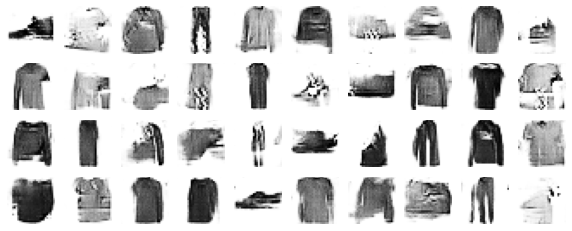

Epoch 2/50


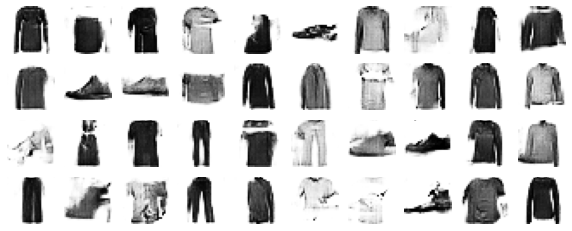

Epoch 3/50


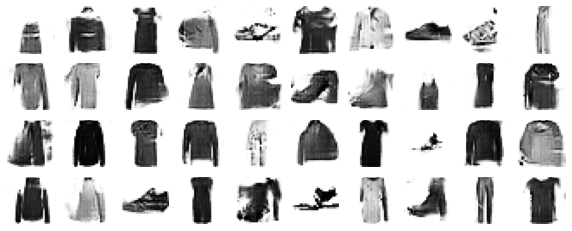

Epoch 4/50


KeyboardInterrupt: ignored

In [ ]:
%%time
batch_size = 40
n_epochs = 50

#訓練データの構造を変換
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2.-1.
#訓練データをスライスしてイテレート可能なデータセットを作成
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
#データセットから1000個単位でランダムにサンプリング
dataset = dataset.shuffle(1000)
#全てのデータを網羅するデータセットを作成
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

#学習を実行
train_gan(gan,
          dataset,
          batch_size,
          noise_num,
          n_epochs = n_epochs)
